# Exemple simple de regression linéaire

## 1. Importation des librairies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time

import warnings
#warnings.filterwarnings('ignore')

## 2. Définition des données d'apprentissage

In [2]:
a = 0.1
b = -0.5
X = np.arange(0,1,0.05)
Y_gt = a*X + b
Y = Y_gt + np.random.uniform(-0.02,0.02,X.shape)

## 3. Architecture du réseau 

In [3]:
linear_model = tf.keras.models.Sequential()
#une première couche avec un neurone (couche cachée)
linear_model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

## Définition des paramètres d'apprentissage
# On choisit la méthode d'optimisation
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# On compile le graphe en précisant le nom fonction de coût utlisée
linear_model.compile(sgd, loss='mean_squared_error', metrics=['mean_absolute_error'])

# il minimise l'erreur quadratique mais on le visualise la metrique


## 4. Apprentissage du réseau

In [4]:
# On commence l'apprentissage à proprement parler
linear_model.fit(X, Y, batch_size=1, epochs=50, shuffle='True')   

# shuffle : a chaque epoch il change l'ordre ou il voit les exemples

Epoch 1/50
20/20 [==============================] - 1s 2ms/step - loss: 0.6937 - mean_absolute_error: 0.7163
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.1412 - mean_absolute_error: 0.2997
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0365 - mean_absolute_error: 0.1563
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0131 - mean_absolute_error: 0.0972
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_absolute_error: 0.0745
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0043 - mean_absolute_error: 0.0581
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0398
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_absolute_error: 0.0312
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 7.5041e-04 - mean_absolute_error: 0.0235
Epoch 10/50
20/

In [5]:
# Affichage du paramètres du reseau après l'apprentissage
# Qu'observez vous ?
weights = linear_model.layers[0].get_weights()
print(weights)

[array([[0.10972287]], dtype=float32), array([-0.49926075], dtype=float32)]


## 5. Prédiction par le réseau

In [6]:
Y_pred = linear_model.predict(X)

1/1 [==============================] - 0s 110ms/step


## 6. Visualisation des résultats

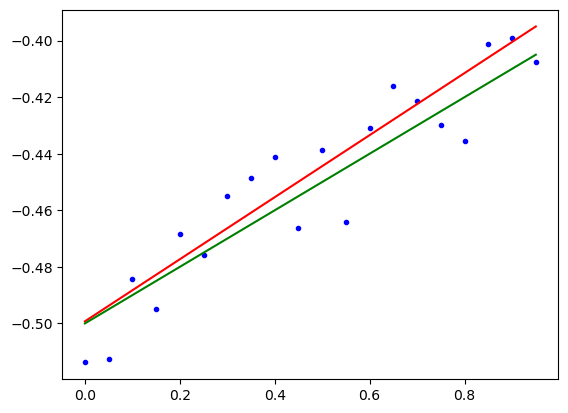

In [7]:
plt.plot(X,Y,'.b')
plt.plot(X,Y_pred,'r')
plt.plot(X,Y_gt,'g')
plt.show()

## A faire

- Observer la robustesse du modèle en faisant varier l'intensité du bruit sur les exemples
- Observer le résultat de l'apprentissage pour d'autres fonctions affines